In [80]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import models

random.seed(10)
print(random.random()) 

0.5714025946899135


In [2]:
df = pd.read_excel("default of credit card clients.xls", header=1).set_index("ID")
df = df.rename({"default payment next month": "default"}, axis=1)

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [4]:
print(df.columns), print(df.loc[:2])

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default  
ID      

(None, None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [6]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
"""
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

"""

'\nThis research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:\nX1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.\nX2: Gender (1 = male; 2 = female).\nX3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).\nX4: Marital status (1 = married; 2 = single; 3 = others).\nX5: Age (year).\nX6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine m

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


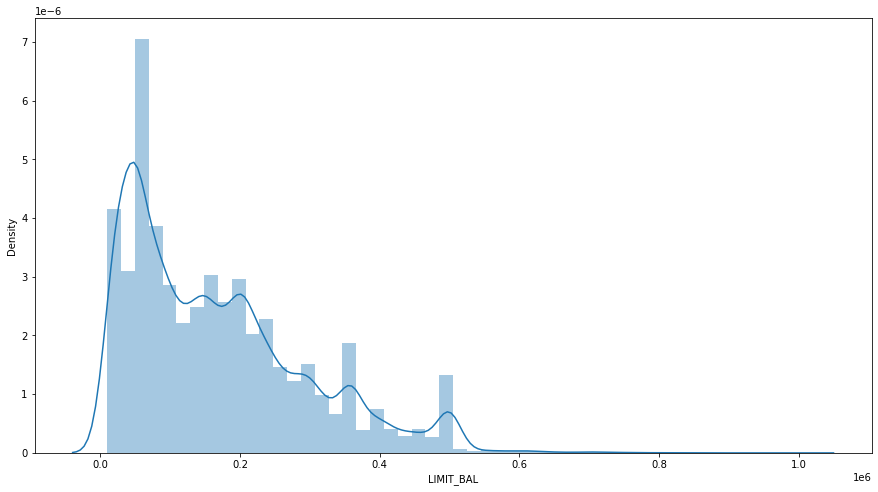

In [9]:
plt.figure(figsize=(15,8))
sns.distplot(df["LIMIT_BAL"])
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


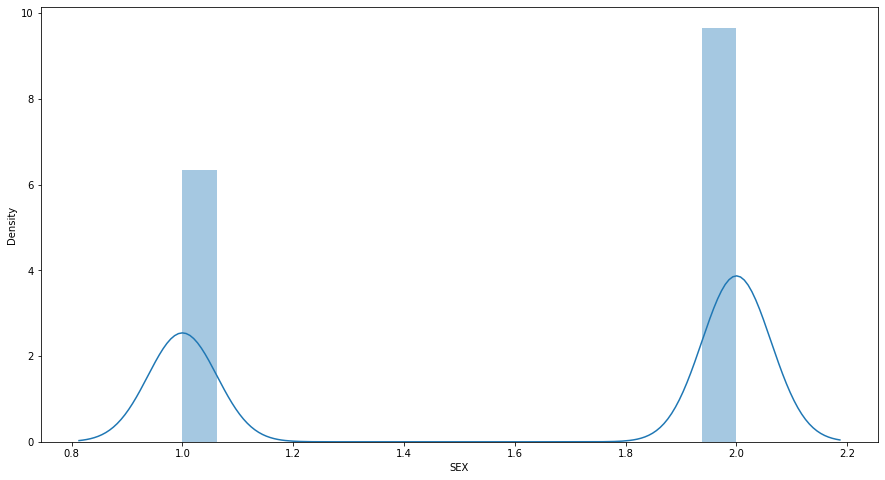

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(df["SEX"])
plt.show()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


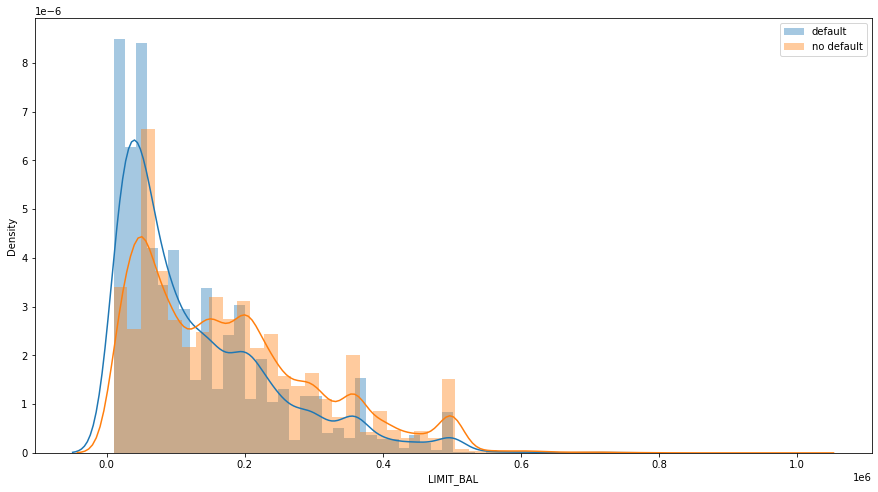

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(df[df["default"]==1]["LIMIT_BAL"], label='default')
sns.distplot(df[df["default"]==0]["LIMIT_BAL"], label='no default')
plt.legend()
plt.show()

In [13]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [14]:
# Education has only 4 categorical levels, removing columns with higher values
df = df[df["EDUCATION"]<=4]

In [15]:
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"] + pay_cols
continuous_columns = [c for c in df.columns if c not in categorical_columns + ["default"]]
target_col = "default"

In [16]:
# male=1, female=2 => male=1, female=0
df["feature_SEX"] = (df["SEX"] == 1)

# Education encoding
edu_encoder = OneHotEncoder()
df[["edu_0", "edu_1", "edu_2", "edu_3", "edu_4"]] = edu_encoder.fit_transform(df["EDUCATION"].values.reshape(-1, 1)).toarray()

# encoding the columns having categorical values for pyment due
enc = OneHotEncoder()
enc.fit(df[pay_cols[0]].values.reshape(-1, 1))

for col in pay_cols:
    df[[f"PAY_{col[-1]}_{ix}" for ix in range(-2, 9)]] = enc.transform(df[col].values.reshape(-1, 1)).toarray()

# Encoding marrige column

marrige_encoder = OneHotEncoder()
df[["marriage_0", "marriage_1", "marriage_2", "marriage_3"]] = marrige_encoder.fit_transform(df["MARRIAGE"].values.reshape(-1, 1)).toarray()

C:\Users\surajp\AppData\Local\Temp/ipykernel_9424/2564031733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["feature_SEX"] = (df["SEX"] == 1)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [17]:
feature_names = [f for f in df.columns if f not in categorical_columns+["default"]]

In [18]:
feature_names

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'feature_SEX',
 'edu_0',
 'edu_1',
 'edu_2',
 'edu_3',
 'edu_4',
 'PAY_0_-2',
 'PAY_0_-1',
 'PAY_0_0',
 'PAY_0_1',
 'PAY_0_2',
 'PAY_0_3',
 'PAY_0_4',
 'PAY_0_5',
 'PAY_0_6',
 'PAY_0_7',
 'PAY_0_8',
 'PAY_2_-2',
 'PAY_2_-1',
 'PAY_2_0',
 'PAY_2_1',
 'PAY_2_2',
 'PAY_2_3',
 'PAY_2_4',
 'PAY_2_5',
 'PAY_2_6',
 'PAY_2_7',
 'PAY_2_8',
 'PAY_3_-2',
 'PAY_3_-1',
 'PAY_3_0',
 'PAY_3_1',
 'PAY_3_2',
 'PAY_3_3',
 'PAY_3_4',
 'PAY_3_5',
 'PAY_3_6',
 'PAY_3_7',
 'PAY_3_8',
 'PAY_4_-2',
 'PAY_4_-1',
 'PAY_4_0',
 'PAY_4_1',
 'PAY_4_2',
 'PAY_4_3',
 'PAY_4_4',
 'PAY_4_5',
 'PAY_4_6',
 'PAY_4_7',
 'PAY_4_8',
 'PAY_5_-2',
 'PAY_5_-1',
 'PAY_5_0',
 'PAY_5_1',
 'PAY_5_2',
 'PAY_5_3',
 'PAY_5_4',
 'PAY_5_5',
 'PAY_5_6',
 'PAY_5_7',
 'PAY_5_8',
 'PAY_6_-2',
 'PAY_6_-1',
 'PAY_6_0',
 'PAY_6_1',
 'PAY_6_2',
 'PAY_6_3',
 'PAY_

In [19]:
X = df.drop(["default"], axis=1)[feature_names].astype(float)
y = df["default"].astype(float)

In [20]:
(df["default"]==1).mean()

0.22279146583976542

In [21]:
continuous_cols = [c for c in feature_names if "AMT"]

## Experiment with Cross Validation

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train[continuous_cols] = sc.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = sc.transform(X_test[continuous_cols])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train.mean()

C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\surajp\miniconda3\envs\realad\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


0.22270907941858015

In [82]:
def get_model():
    model = models.Sequential()
    model.add(L.Dense(256, input_dim = (len(feature_names)), activation="relu"))
    model.add(L.Dense(128, activation="relu"))
    model.add(L.Dense(64, activation="relu"))
    model.add(L.Dense(32, activation="relu"))
    model.add(L.Dense(1, activation="sigmoid"))

    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy", "AUC"])

    return model

In [83]:
model = get_model()
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 256)               23296     
_________________________________________________________________
dense_321 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_322 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_323 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_324 (Dense)            (None, 1)                 33        
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [84]:
def evaluate(y_true, y_preds):
    loss = tf.keras.losses.binary_crossentropy(y_true, y_preds).numpy()

    return loss

In [85]:
X

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,marriage_0,marriage_1,marriage_2,marriage_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29997,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29998,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
folds = KFold(n_splits=5)
#folds = LeaveOneOut()

hist_arr = []
models_arr = []
validation_metrics =[]

for train_idx, val_idx in folds.split(X_train, y_train):
    print(train_idx, val_idx)
    print(len(train_idx), len(val_idx))

    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    model = get_model()

    hist = model.fit(X_tr, y_tr, epochs=20)
    hist_arr.append(hist)
    models_arr.append(model)

    model_scores = model.evaluate(X_val, y_val)
    validation_metrics.append(model_scores)

    break

[ 4747  4748  4749 ... 23732 23733 23734] [   0    1    2 ... 4744 4745 4746]
18988 4747
Epoch 1/10
594/594 [==============================] - 1s 862us/step - loss: 318.0345 - accuracy: 0.6787 - auc: 0.5489
Epoch 2/10
594/594 [==============================] - 1s 933us/step - loss: 0.9680 - accuracy: 0.7213 - auc: 0.5878
Epoch 3/10
594/594 [==============================] - 1s 868us/step - loss: 0.7419 - accuracy: 0.7684 - auc: 0.5317
Epoch 4/10
594/594 [==============================] - 1s 886us/step - loss: 0.6909 - accuracy: 0.7690 - auc: 0.5094
Epoch 5/10
594/594 [==============================] - 1s 892us/step - loss: 0.8562 - accuracy: 0.7668 - auc: 0.4950
Epoch 6/10
594/594 [==============================] - 1s 883us/step - loss: 0.6436 - accuracy: 0.7735 - auc: 0.4956
Epoch 7/10
594/594 [==============================] - 1s 873us/step - loss: 0.5464 - accuracy: 0.7738 - auc: 0.4947
Epoch 8/10
594/594 [==============================] - 1s 899us/step - loss: 0.5357 - accuracy: 0.

In [90]:
validation_metrics

[[0.5536526441574097, 0.7779650092124939, 0.49952560663223267]]

In [41]:
#hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

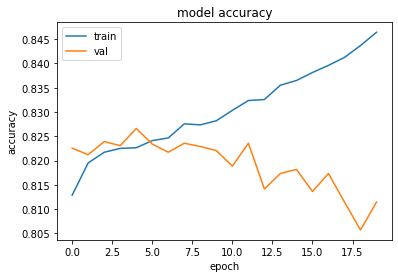

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

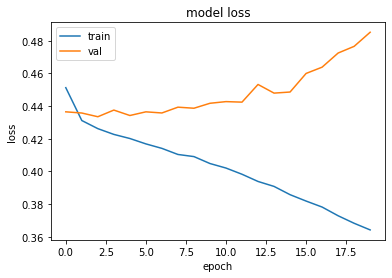

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

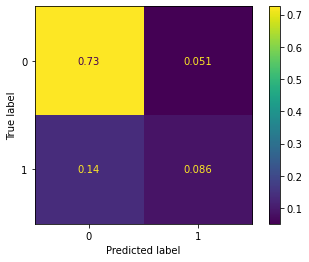

In [30]:
test_preds = model.predict(X_test)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_test, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

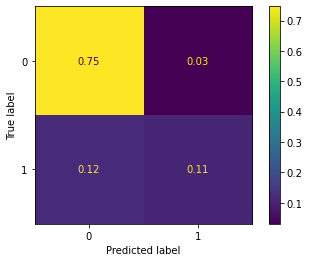

In [31]:
test_preds = model.predict(X_train)
test_preds = (test_preds>=0.5).astype(int)

cm = metrics.confusion_matrix(y_train, test_preds, normalize="all")
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()




In [32]:
test_preds = model.predict(X_train)
test_preds = (test_preds>=0.5).astype(int)

r2 = metrics.r2_score(y_train, test_preds)
r2


0.1463554122182007